### Problem Statement

In [3]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


### Reading data set

In [4]:
# Importing dataset
houseDF=pd.read_csv("train.csv")
houseDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## EDA and data understanding


In [5]:
#checking unique value in the dataset
houseDF.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [6]:
# Checking info about the dataset
houseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Visualize int64 features

In [7]:
# Storing int variable in the intDF
intDF=houseDF.select_dtypes('int64')
intDF.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


### Plotting all the integer values

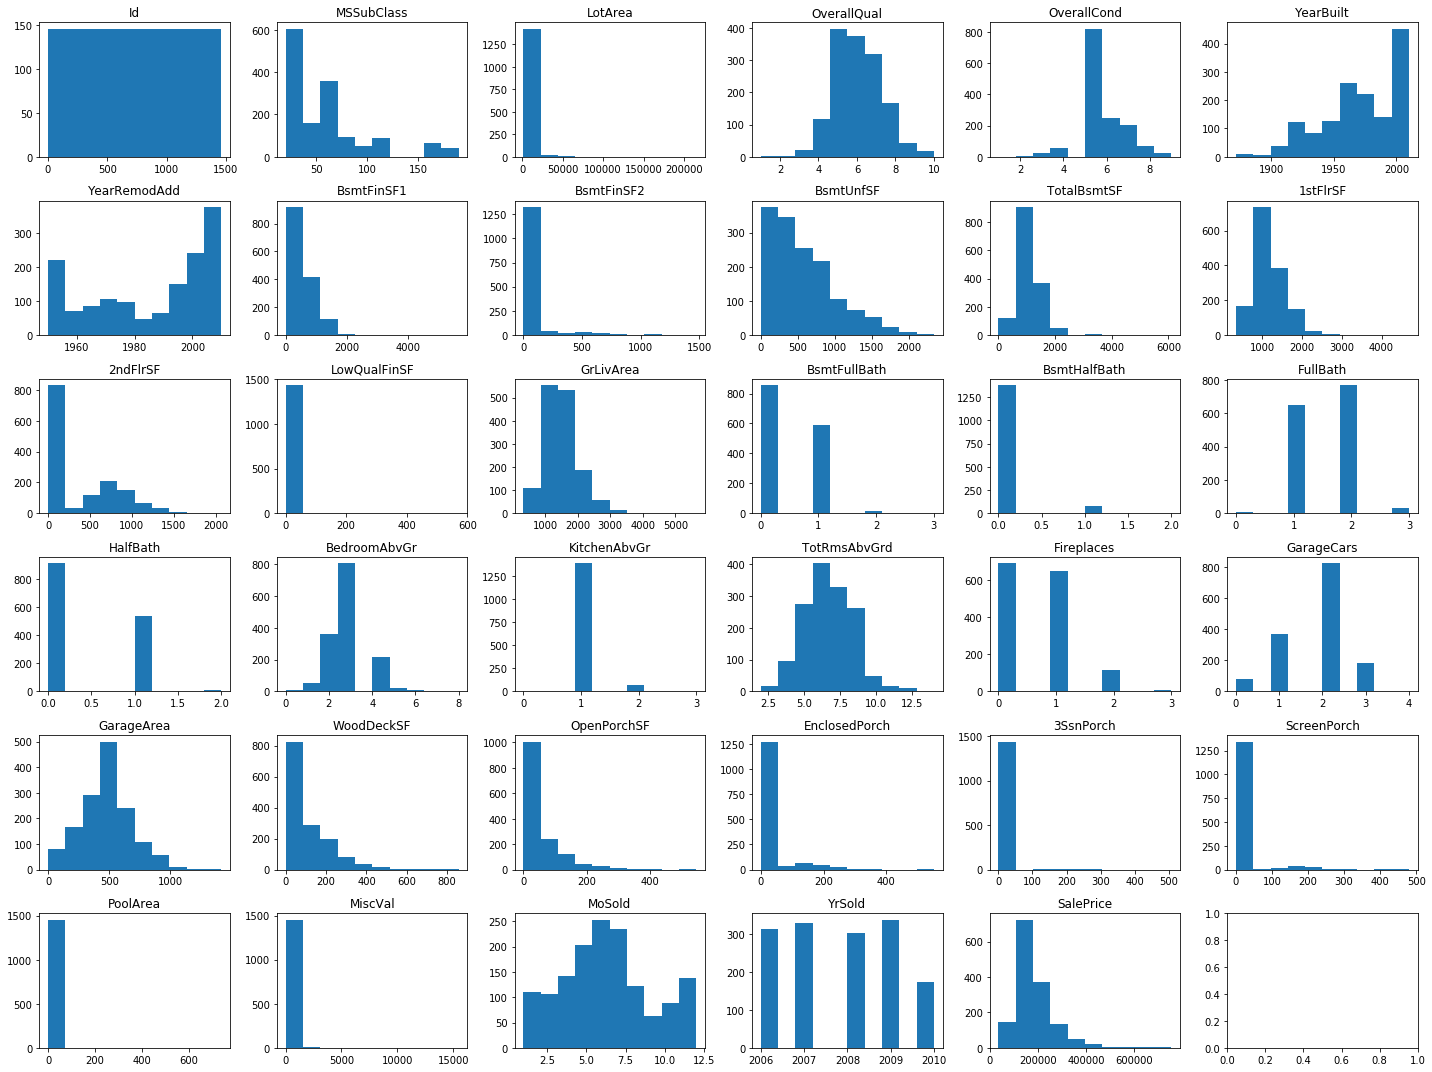

In [8]:
# plotting integer values
fig,ax=plt.subplots(6,6,figsize=(20,15))#(subplotpars=(6,6)
k=0
columns=intDF.columns
for i in range(6):
    for j in range(6):
        if k==35:
            break
        ax[i][j].hist(intDF[columns[k]])
        ax[i][j].set_title(columns[k])
        k+=1
fig.tight_layout()

Text(0.5, 1.0, 'Categorical Column Count')

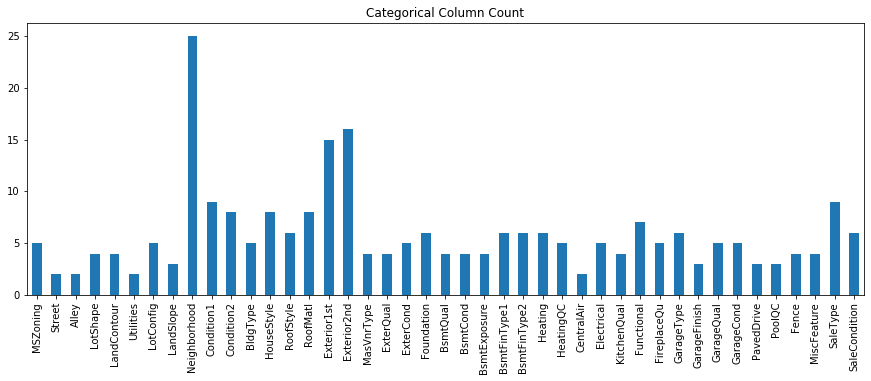

In [9]:
# Storing object column in the objectDF and visualizing
objectDF=houseDF.select_dtypes("object")
objectDF.nunique().plot(kind='bar',figsize=(15,5))
plt.title("Categorical Column Count")

### Visualizing categorical variable

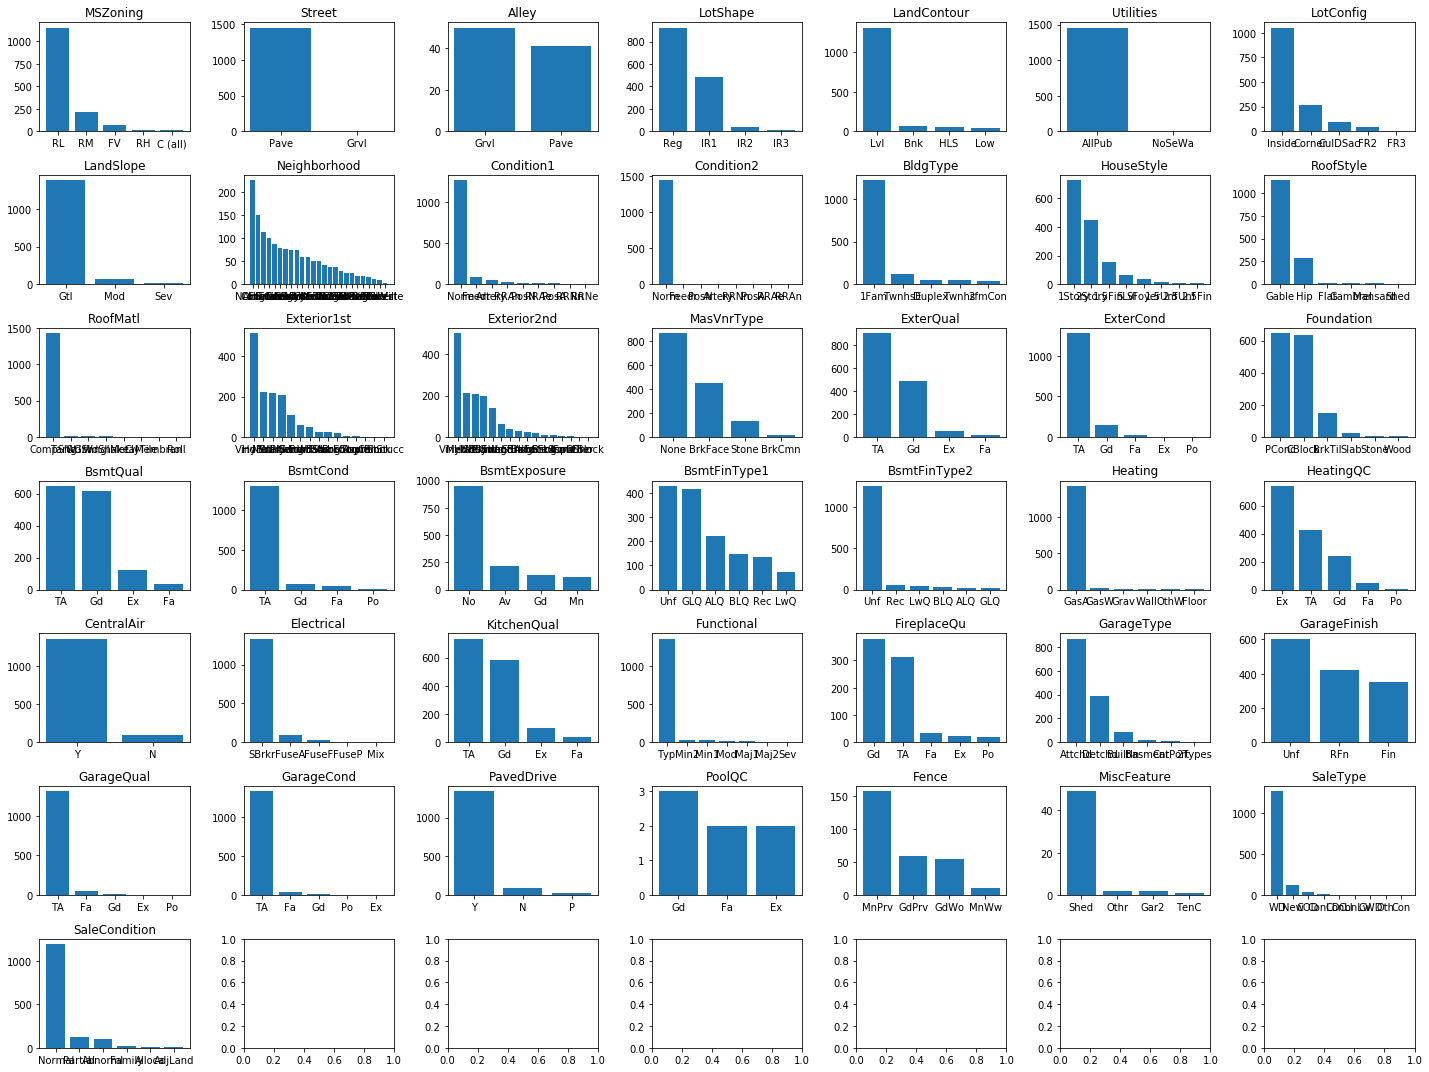

In [10]:
fig,ax=plt.subplots(7,7,figsize=(20,15))#(subplotpars=(6,6)
k=0
columns=objectDF.columns
for i in range(7):
    for j in range(7):
        
        if k==43:
            break
        tmp=objectDF[columns[k]].value_counts()
        #plt.bar(tmp.index,tmp.values)
        ax[i][j].bar(tmp.index,tmp.values)#hist(objectDF[columns[k]])
        ax[i][j].set_title(columns[k])
        k+=1
fig.tight_layout()

In [11]:
# Storing float value in the floatDF
floatDF=houseDF.select_dtypes("float64")
floatDF.head()

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0


### Checking Missing values

In [12]:
# checking missing values in intDF
intDF.isna().sum()/intDF.shape[0]

Id               0.0
MSSubClass       0.0
LotArea          0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
TotRmsAbvGrd     0.0
Fireplaces       0.0
GarageCars       0.0
GarageArea       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SalePrice        0.0
dtype: float64

There is no missing values in the intDF

In [13]:
# Checking missing values in categorical columns
(objectDF.isna().sum()/objectDF.shape[0])*100

MSZoning          0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinType2      2.602740
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.068493
KitchenQual       0.000000
Functional        0.000000
FireplaceQu      47.260274
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
P

There are few missing columns in the categorical columns

In [14]:
# Checking missing value columns with more than 60 percent data
objectDF.columns[(objectDF.isna().sum()/objectDF.shape[0])*100 >60].tolist()

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [15]:
# checking missing values in the floatDF
(floatDF.isna().sum()/objectDF.shape[0])*100 #>60].tolist()

LotFrontage    17.739726
MasVnrArea      0.547945
GarageYrBlt     5.547945
dtype: float64

In [16]:
# creating column names without more than 60 percent missing values
choosenColumns=[col for col in objectDF.columns if col not in ['Alley', 'PoolQC', 'Fence', 'MiscFeature']]
choosenColumns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

### Removing Skewness

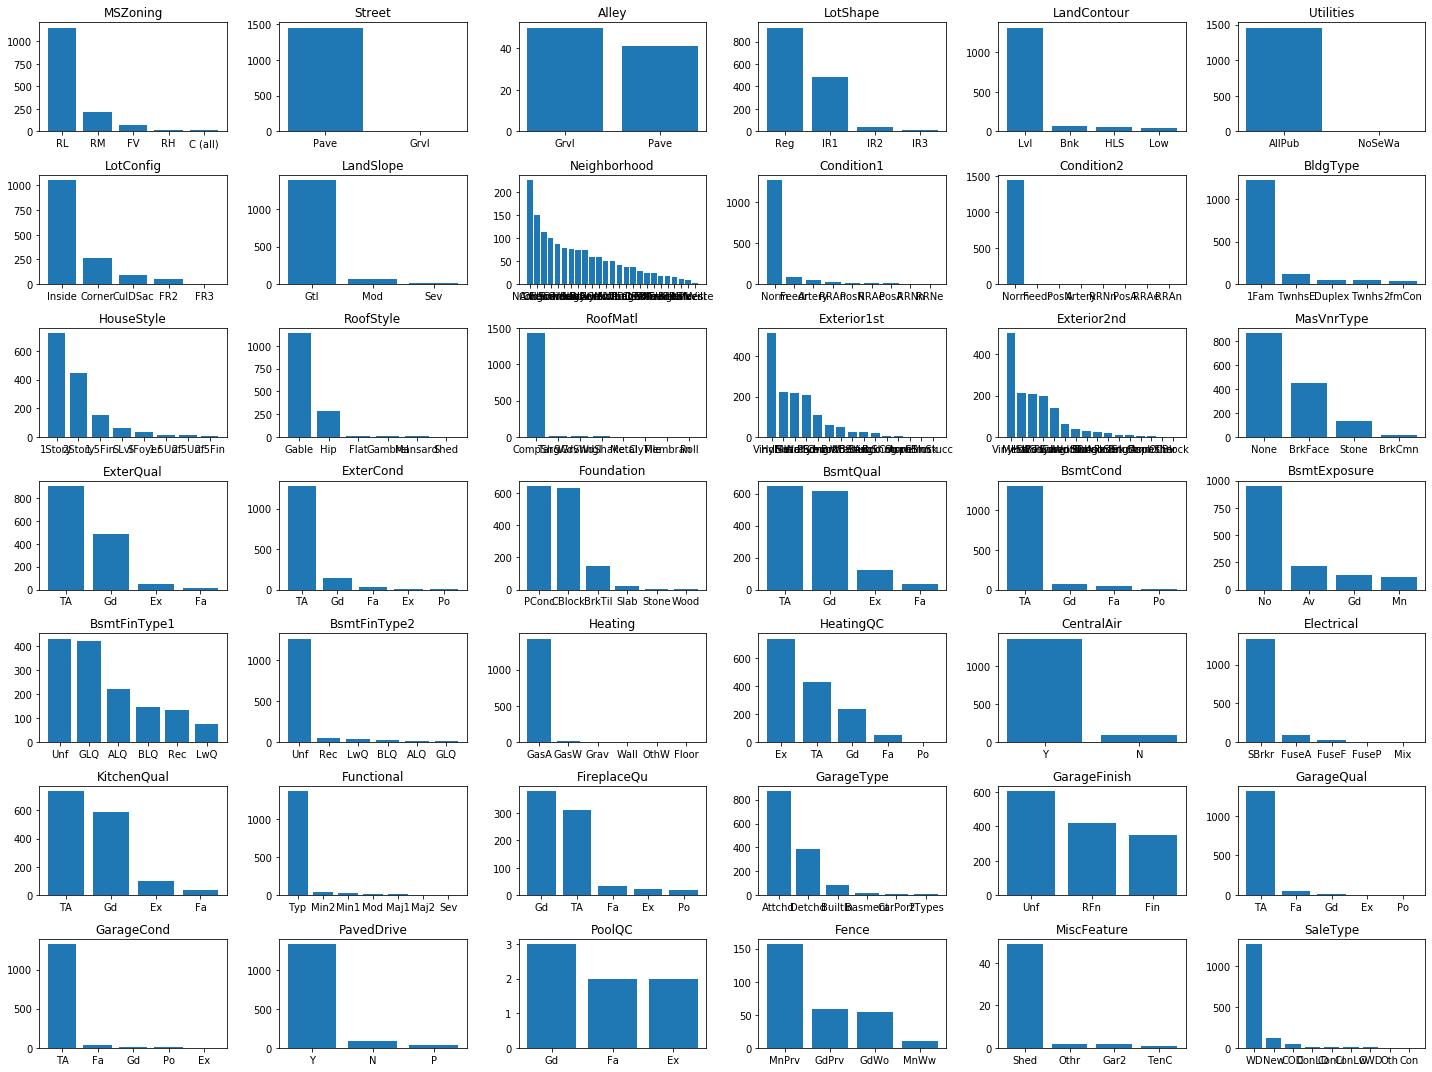

In [17]:
fig,ax=plt.subplots(7,6,figsize=(20,15))
cnt=0
columns=objectDF.columns.tolist()
for i in range(7):
    for j in range(6):
        try:
            tmp=objectDF[columns[cnt]].value_counts()
            ax[i][j].bar(tmp.index,tmp.values)
            ax[i][j].set_title(columns[cnt])
            cnt+=1
        except IndexError:
            break
fig.tight_layout()

In [18]:
# skewed columns
skewed_col=["Street","LandContour","LandSlope","Condition1","Condition2","RoofMatl","GarageQual","GarageCond","BsmtFinType2","Heating","Electrical","Functional"]

In [19]:
print(objectDF.shape)
# dropping skewed data
objectDF=objectDF.drop(skewed_col,axis=1)
objectDF.shape

(1460, 43)


(1460, 31)

In [20]:
def reduceCategory (col,categoryList,df=objectDF):
    df[col][~df[col].isin(categoryList)]="others"

objcols=objectDF.select_dtypes('object').columns
for col in objcols:
    tmp=objectDF[col].value_counts()
    mask=(tmp*100/objectDF.shape[0])>10
    #print(tmp*100/df4.shape[0])
    print(tmp[mask].unique().shape,tmp.unique().shape)
    reduceCategory(col,tmp[mask].index.tolist())
    
    

(2,) (5,)
(0,) (2,)
(2,) (4,)
(1,) (2,)
(2,) (5,)
(2,) (23,)
(1,) (5,)
(3,) (8,)
(2,) (6,)
(4,) (12,)
(4,) (15,)
(2,) (4,)
(2,) (4,)
(1,) (5,)
(2,) (6,)
(2,) (4,)
(1,) (4,)
(2,) (4,)
(4,) (6,)
(3,) (5,)
(1,) (2,)
(2,) (4,)
(2,) (5,)
(2,) (6,)
(3,) (3,)
(1,) (3,)
(0,) (2,)
(1,) (4,)
(0,) (3,)
(1,) (8,)
(1,) (6,)


Text(0.5, 1.0, 'Categorical Column Count after skewness removed')

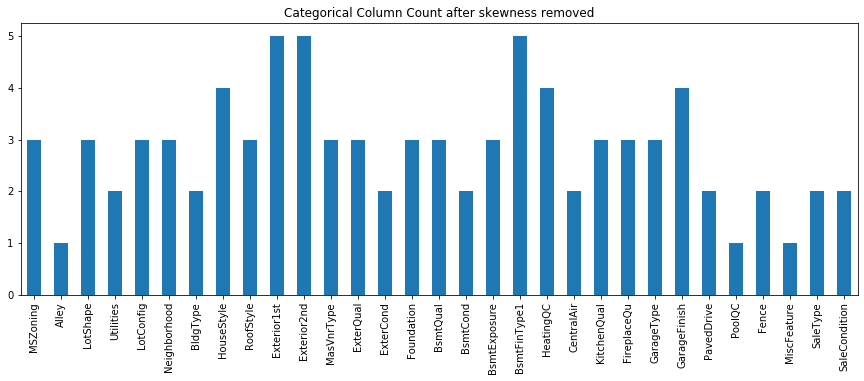

In [21]:
# plotting unique object
objectDF.nunique().plot(kind='bar',figsize=(15,5))
plt.title("Categorical Column Count after skewness removed")

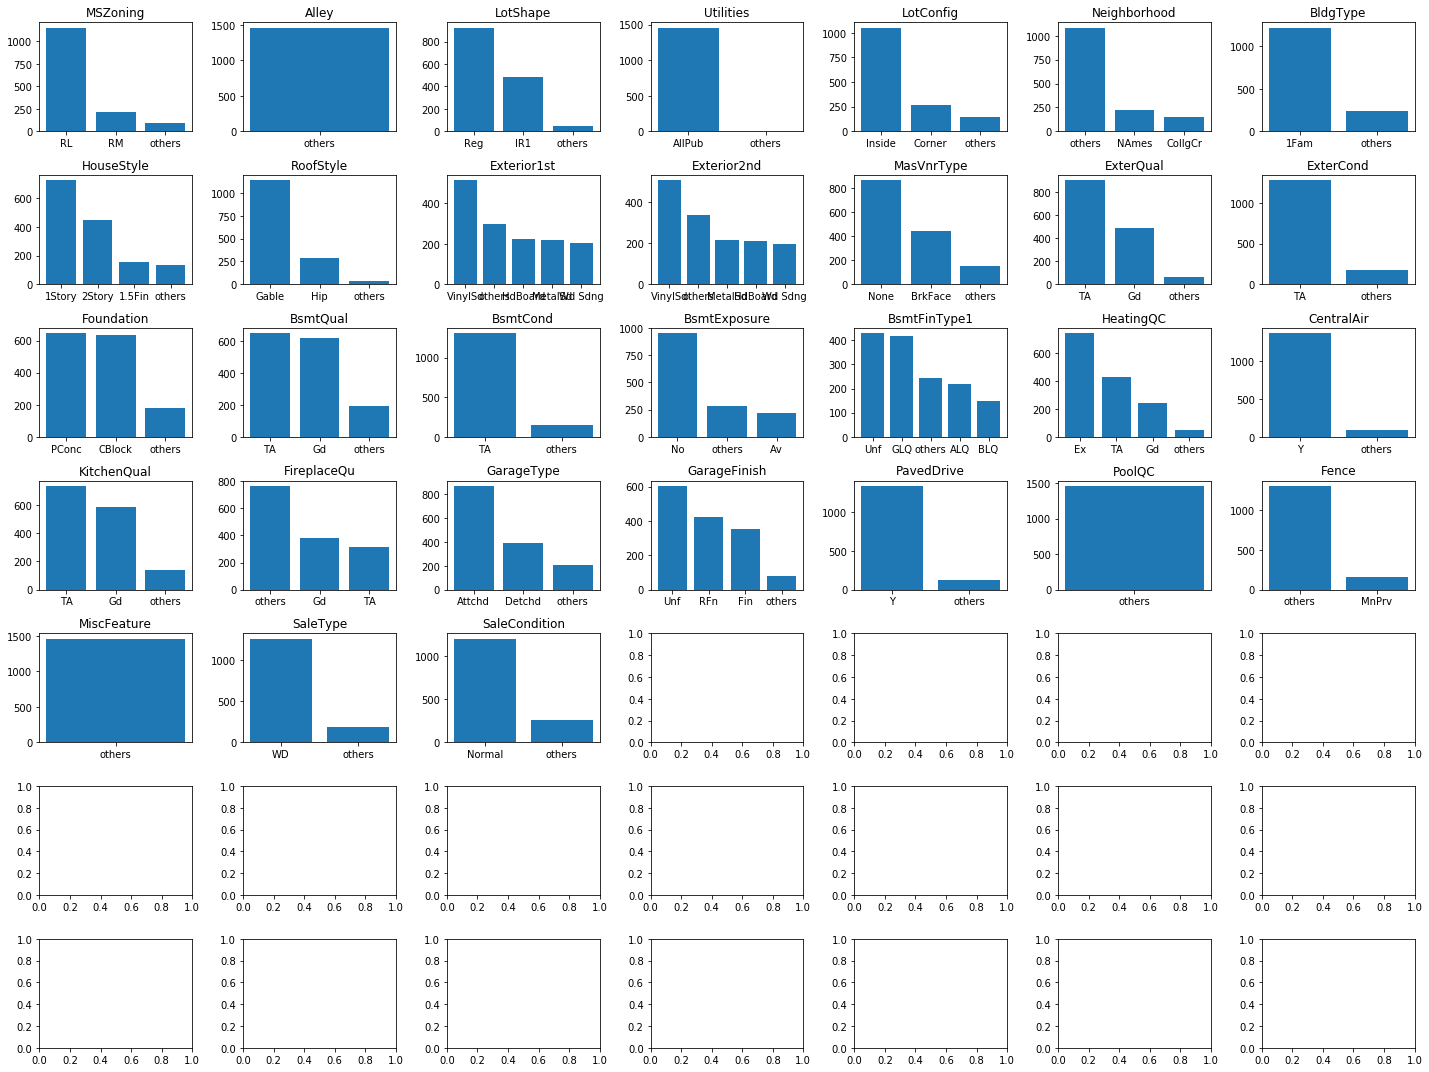

In [22]:
fig,ax=plt.subplots(7,7,figsize=(20,15))#(subplotpars=(6,6)
k=0
columns=objectDF.columns
for i in range(7):
    for j in range(7):
        
        if k==31:
            break
        tmp=objectDF[columns[k]].value_counts()
        #plt.bar(tmp.index,tmp.values)
        ax[i][j].bar(tmp.index,tmp.values)#hist(objectDF[columns[k]])
        ax[i][j].set_title(columns[k])
        k+=1
fig.tight_layout()

In [23]:
# Removing skewed from the choosen columns
choosenColumns=[col for col in choosenColumns if col not in skewed_col]

In [24]:
# final data set
cleanedDF=pd.concat([intDF,objectDF[choosenColumns],floatDF],axis=1)
cleanedDF.shape

(1460, 65)

### calculate Age for Year columns

In [25]:
yearsColumn=cleanedDF.columns[cleanedDF.columns.str.lower().str.contains("year")].tolist()+\
            cleanedDF.columns[cleanedDF.columns.str.lower().str.contains("yr")].tolist()


In [26]:
yearsColumn

['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt']

In [27]:
cleanedDF[yearsColumn[-1]].astype('str').apply(lambda x: x.split('.')[0]).replace('nan',2005).value_counts(dropna=False)

2005    81
2005    65
2006    59
2004    53
2003    50
        ..
1906     1
1927     1
1933     1
1908     1
1900     1
Name: GarageYrBlt, Length: 98, dtype: int64

In [28]:
cleanedDF[yearsColumn[-1]]=cleanedDF[yearsColumn[-1]].astype('str').apply(lambda x: x.split('.')[0]).replace('nan',2005).astype('int')

In [29]:
# created dataframe with age for 4 columns
cleanedDF[yearsColumn].fillna(cleanedDF[yearsColumn].mode())                                         
yearsAgeDF=cleanedDF[yearsColumn].apply(lambda x:2020-x)#.astype(int)
yearsAgeDF=yearsAgeDF.fillna(yearsAgeDF.mode()).astype(int)
yearsAgeDF.columns=[f"{col}_Age" for col in yearsColumn]
yearsAgeDF.head()

,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age
0,17,17,12,17
1,44,44,13,44
2,19,18,12,19
3,105,50,14,22
4,20,20,12,20


In [30]:
# Dropping existing years columns
cleanedDF=cleanedDF.drop(yearsColumn,axis=1,errors='ignore')
cleanedDF.shape

(1460, 61)

In [31]:
# filling all missiing values with mean
cleanedDF=cleanedDF.fillna(cleanedDF.mean())
cleanedDF.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,CentralAir,KitchenQual,FireplaceQu,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition,LotFrontage,MasVnrArea
0,1,60,8450,7,5,706,0,150,856,856,...,Y,Gd,others,Attchd,RFn,Y,WD,Normal,65.0,196.0
1,2,20,9600,6,8,978,0,284,1262,1262,...,Y,TA,TA,Attchd,RFn,Y,WD,Normal,80.0,0.0
2,3,60,11250,7,5,486,0,434,920,920,...,Y,Gd,TA,Attchd,RFn,Y,WD,Normal,68.0,162.0
3,4,70,9550,7,5,216,0,540,756,961,...,Y,Gd,Gd,Detchd,Unf,Y,WD,others,60.0,0.0
4,5,60,14260,8,5,655,0,490,1145,1145,...,Y,Gd,TA,Attchd,RFn,Y,WD,Normal,84.0,350.0


In [32]:
# final cleaned dataframe
cleanedDF=pd.concat([cleanedDF,yearsAgeDF],axis=1)

### Target Transformations

In [33]:
# finding target variable from the data
targetColumn=cleanedDF.columns[cleanedDF.columns.str.lower().str.contains('price')][0]
targetColumn

'SalePrice'

Text(0.5, 1.0, 'SalePrice Distribuitions')

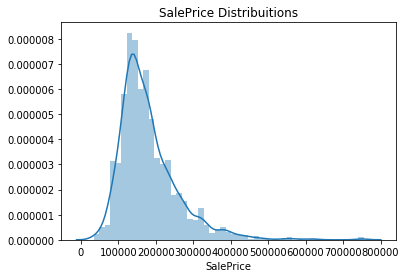

In [34]:
# Sales price Distribution
sns.distplot(cleanedDF[targetColumn])
plt.title(f"{targetColumn} Distribuitions")

In [35]:
f"{targetColumn} seems to follow normal Distribuition"

'SalePrice seems to follow normal Distribuition'

### Power Transformation

In [36]:
pwt=preprocessing.PowerTransformer()
pwt.fit(cleanedDF[targetColumn].values.reshape(-1,1))

PowerTransformer(copy=True, method='yeo-johnson', standardize=True)

Text(0.5, 1.0, 'SalePrice Distribuitions after Power Transform')

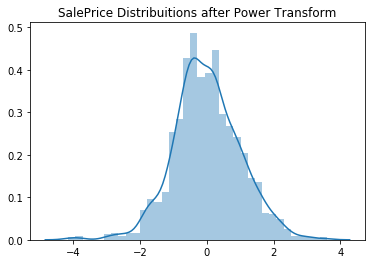

In [37]:
# Transforming data
transformedSalePrice=pwt.transform(cleanedDF[targetColumn].values.reshape(-1,1))
sns.distplot(transformedSalePrice.squeeze())
plt.title(f"{targetColumn} Distribuitions after Power Transform")

### Feature Transformation

In [38]:
cleanedDF.select_dtypes(exclude="object")

,Id,MSSubClass,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,PoolArea,MiscVal,MoSold,SalePrice,LotFrontage,MasVnrArea,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age
0,1,60,8450,7,5,706,0,150,856,856,...,0,0,2,208500,65.0,196.0,17,17,12,17
1,2,20,9600,6,8,978,0,284,1262,1262,...,0,0,5,181500,80.0,0.0,44,44,13,44
2,3,60,11250,7,5,486,0,434,920,920,...,0,0,9,223500,68.0,162.0,19,18,12,19
3,4,70,9550,7,5,216,0,540,756,961,...,0,0,2,140000,60.0,0.0,105,50,14,22
4,5,60,14260,8,5,655,0,490,1145,1145,...,0,0,12,250000,84.0,350.0,20,20,12,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,0,0,953,953,953,...,0,0,8,175000,62.0,0.0,21,20,13,21
1456,1457,20,13175,6,6,790,163,589,1542,2073,...,0,0,2,210000,85.0,119.0,42,32,10,42
1457,1458,70,9042,7,9,275,0,877,1152,1188,...,0,2500,5,266500,66.0,0.0,79,14,10,79
1458,1459,20,9717,5,6,49,1029,0,1078,1078,...,0,0,4,142125,68.0,0.0,70,24,10,70


In [39]:
# Dummy variables
catgoricalDF=pd.get_dummies(cleanedDF.select_dtypes(include="object"))
catgoricalDF.shape

(1460, 82)

In [40]:
cleanedDF=pd.concat([cleanedDF.select_dtypes(exclude='object'),catgoricalDF],axis=1)

In [41]:
# X and y split
X=cleanedDF.drop(targetColumn,axis=1)
y=transformedSalePrice
X.shape,y.shape

((1460, 119), (1460, 1))

In [42]:
finalChoosenColumns=intDF.columns[1:].tolist()+floatDF.columns[:1].tolist()+[f"{col}_Age" for col in yearsColumn]
finalChoosenColumns=[col for col in finalChoosenColumns if col not in yearsColumn]
finalChoosenColumns

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice',
 'LotFrontage',
 'YearBuilt_Age',
 'YearRemodAdd_Age',
 'YrSold_Age',
 'GarageYrBlt_Age']

### Feature Selection using RFE

In [43]:
# Removed ID column which will not be useful for anlaysis
cleanedDF=cleanedDF.drop("Id",axis=1,errors="ignore")

In [44]:
# Spliting Train and test data
X_train, X_test, y_train, y_test = train_test_split(
     cleanedDF, y, test_size=0.33, random_state=42)

In [45]:
cleanedDF.head()

,MSSubClass,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_others,PavedDrive_Y,PavedDrive_others,SaleType_WD,SaleType_others,SaleCondition_Normal,SaleCondition_others
0,60,8450,7,5,706,0,150,856,856,854,...,0,1,0,0,1,0,1,0,1,0
1,20,9600,6,8,978,0,284,1262,1262,0,...,0,1,0,0,1,0,1,0,1,0
2,60,11250,7,5,486,0,434,920,920,866,...,0,1,0,0,1,0,1,0,1,0
3,70,9550,7,5,216,0,540,756,961,756,...,0,0,1,0,1,0,1,0,0,1
4,60,14260,8,5,655,0,490,1145,1145,1053,...,0,1,0,0,1,0,1,0,1,0


In [46]:
# Scaling for numerical data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[finalChoosenColumns]=scaler.fit_transform(X_train[finalChoosenColumns])
X_test[finalChoosenColumns]=scaler.transform(X_test[finalChoosenColumns])

In [47]:
X_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_others,PavedDrive_Y,PavedDrive_others,SaleType_WD,SaleType_others,SaleCondition_Normal,SaleCondition_others
615,0.382353,0.035056,0.555556,0.75,0.135188,0.000000,0.074058,0.153191,0.165213,0.0,...,0,1,0,0,1,0,1,0,0,1
613,0.000000,0.033195,0.444444,0.50,0.036499,0.000000,0.391267,0.183306,0.180358,0.0,...,0,0,0,1,1,0,0,1,0,1
1303,0.000000,0.034532,0.666667,0.50,0.000000,0.000000,0.691781,0.264484,0.294172,0.0,...,0,1,0,0,1,0,1,0,1,0
486,0.000000,0.042015,0.444444,0.75,0.148122,0.000000,0.101455,0.175614,0.169573,0.0,...,0,1,0,0,1,0,1,0,1,0
561,0.000000,0.040711,0.444444,0.50,0.189759,0.109139,0.083476,0.227332,0.242084,0.0,...,0,1,0,0,1,0,1,0,1,0


In [48]:
# Selecting top features
lasso=Lasso()
rfe = RFE(lasso, 50)

In [49]:
rfe = rfe.fit(X_train, y_train)

In [50]:
selectedCols=X_train.columns[rfe.support_]
selectedCols

Index(['MasVnrArea', 'YearBuilt_Age', 'YearRemodAdd_Age', 'YrSold_Age',
       'GarageYrBlt_Age', 'MSZoning_RL', 'MSZoning_RM', 'MSZoning_others',
       'LotShape_IR1', 'LotShape_Reg', 'LotShape_others', 'Utilities_AllPub',
       'Utilities_others', 'LotConfig_Corner', 'LotConfig_Inside',
       'LotConfig_others', 'Neighborhood_CollgCr', 'Neighborhood_NAmes',
       'Neighborhood_others', 'BldgType_1Fam', 'BldgType_others',
       'HouseStyle_1.5Fin', 'HouseStyle_1Story', 'HouseStyle_2Story',
       'HouseStyle_others', 'HeatingQC_Ex', 'HeatingQC_Gd', 'HeatingQC_TA',
       'HeatingQC_others', 'CentralAir_Y', 'CentralAir_others',
       'KitchenQual_Gd', 'KitchenQual_TA', 'KitchenQual_others',
       'FireplaceQu_Gd', 'FireplaceQu_TA', 'FireplaceQu_others',
       'GarageType_Attchd', 'GarageType_Detchd', 'GarageType_others',
       'GarageFinish_Fin', 'GarageFinish_RFn', 'GarageFinish_Unf',
       'GarageFinish_others', 'PavedDrive_Y', 'PavedDrive_others',
       'SaleType_WD', 'Sa

### Ridge Regression

In [51]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train[selectedCols], y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [52]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002194,1.465791e-03,0.000798,0.000399,0.0001,{'alpha': 0.0001},-0.406244,-0.433850,-0.430016,-0.434333,...,-0.415500,0.023640,24,-0.389088,-0.390539,-0.384891,-0.387624,-0.402548,-0.390938,0.006098
1,0.001795,3.989698e-04,0.000802,0.000401,0.001,{'alpha': 0.001},-0.406242,-0.433850,-0.430015,-0.434333,...,-0.415499,0.023640,23,-0.389088,-0.390538,-0.384891,-0.387625,-0.402548,-0.390938,0.006098
2,0.001995,3.568323e-07,0.000798,0.000399,0.01,{'alpha': 0.01},-0.406228,-0.433843,-0.430004,-0.434329,...,-0.415492,0.023639,22,-0.389090,-0.390536,-0.384896,-0.387627,-0.402552,-0.390940,0.006098
3,0.001596,4.887528e-04,0.000999,0.000003,0.05,{'alpha': 0.05},-0.406166,-0.433815,-0.429956,-0.434310,...,-0.415458,0.023635,21,-0.389101,-0.390528,-0.384919,-0.387637,-0.402567,-0.390950,0.006098
4,0.002199,3.964252e-04,0.000799,0.000400,0.1,{'alpha': 0.1},-0.406089,-0.433780,-0.429897,-0.434285,...,-0.415415,0.023630,20,-0.389113,-0.390516,-0.384946,-0.387649,-0.402585,-0.390962,0.006097


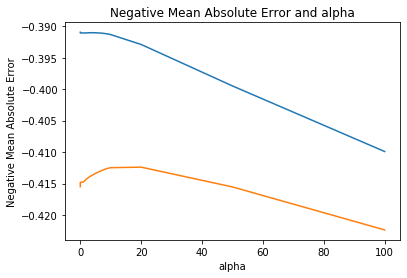

In [53]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
#plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [54]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train[selectedCols], y_train)
ridge.coef_

array([[ 8.92315611e-04, -1.41470507e-01, -5.68012128e-01,
         6.47948403e-02, -1.17270663e-01,  1.43966403e-01,
        -1.70284816e-01,  2.63184131e-02, -4.44990585e-02,
        -1.16763187e-01,  1.61262246e-01,  9.29901202e-02,
        -9.29901202e-02,  2.28106871e-04, -1.06476136e-02,
         1.04195067e-02, -1.92042010e-02, -5.74687551e-02,
         7.66729561e-02,  7.54415440e-02, -7.54415440e-02,
         6.92629476e-02, -1.21609899e-01,  8.71853156e-02,
        -3.48383638e-02,  1.25270602e-01, -3.47612321e-02,
         2.63512669e-04, -9.07728830e-02,  1.41025708e-01,
        -1.41025708e-01, -6.14155156e-03, -2.46509249e-01,
         2.52650801e-01,  1.80430125e-01,  8.27149830e-02,
        -2.63145108e-01,  1.11507447e-01, -5.17209259e-02,
        -5.97865210e-02,  2.57514995e-01,  2.09692989e-01,
         8.76220232e-02, -5.54830007e-01,  8.49189638e-02,
        -8.49189638e-02, -8.89410659e-02,  8.89410659e-02,
         2.08765705e-02, -2.08765705e-02]])

In [55]:
# M
from sklearn import metrics

def evaluate_prices(y_test,y_pred):
    print("r2 score:",metrics.r2_score(y_test,y_pred))
    print("mae:",metrics.mean_absolute_error(y_test,y_pred))
    print("mse:",metrics.mean_squared_error(y_test,y_pred))
    print("rmse:",metrics.mean_squared_error(y_test,y_pred)**0.5)
print("Training")
evaluate_prices(y_train,ridge.predict(X_train[selectedCols]))
print("Testing")
evaluate_prices(y_test,ridge.predict(X_test[selectedCols]))

Training
r2 score: 0.7008431080228069
mae: 0.392992885102404
mse: 0.28918036965587585
rmse: 0.5377549345713862
Testing
r2 score: 0.6915804339702638
mae: 0.41349464429947425
mse: 0.32904295393230903
rmse: 0.5736226581406186


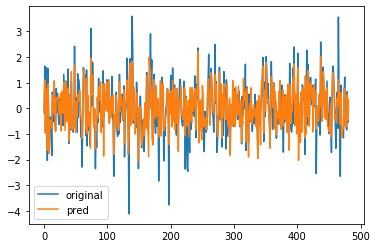

In [56]:
def compare(y_test,pred):
    #pred=ridge.predict(X_test[selectedCols])
    plt.plot(y_test,label="original")
    plt.plot(pred,label="pred")
    plt.legend()
    plt.show()
compare(y_test,ridge.predict(X_test[selectedCols]))

### Lasso

In [57]:
lasso = Lasso()
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.002, 0.003, 0.004, 
 0.005, 0.006, 0.007, 0.008, 0.009,0.01,0.02,0.03,0.04,0.05 ]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train[selectedCols], y_train) 

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005,
                                   0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03,
                                   0.04, 0.05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [58]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018747,0.003358,0.001004,1.134973e-05,0.0001,{'alpha': 0.0001},-0.405771,-0.433748,-0.429912,-0.434012,...,-0.415295,0.023607,7,-0.389160,-0.390519,-0.384998,-0.387643,-0.402617,-0.390988,0.006097
1,0.003391,0.000489,0.000798,3.989935e-04,0.001,{'alpha': 0.001},-0.402928,-0.432951,-0.430631,-0.431668,...,-0.414177,0.023584,5,-0.390299,-0.390443,-0.385910,-0.388246,-0.403433,-0.391666,0.006110
2,0.002793,0.000399,0.000997,5.560829e-07,0.002,{'alpha': 0.002},-0.402238,-0.431821,-0.432646,-0.429923,...,-0.413699,0.023826,3,-0.390912,-0.390550,-0.386316,-0.388865,-0.404035,-0.392136,0.006167
3,0.002393,0.000488,0.000997,5.560829e-07,0.003,{'alpha': 0.003},-0.401049,-0.429976,-0.434817,-0.428933,...,-0.413164,0.024198,1,-0.391111,-0.390434,-0.386831,-0.389644,-0.404824,-0.392569,0.006298
4,0.002592,0.000488,0.000598,4.885777e-04,0.004,{'alpha': 0.004},-0.400290,-0.428560,-0.437194,-0.429204,...,-0.413207,0.024659,2,-0.391859,-0.390210,-0.387732,-0.390958,-0.405903,-0.393332,0.006433


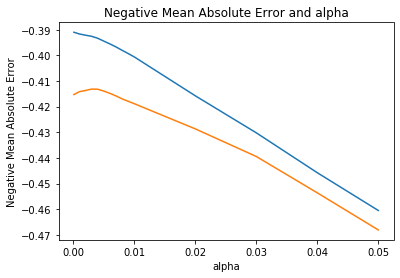

In [59]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
#plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [60]:
alpha =0.005

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train[selectedCols], y_train) 

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [61]:
lasso.coef_

array([ 9.57081001e-04, -5.10350299e-02, -6.59930799e-01,  2.62575091e-02,
       -5.73287902e-02,  9.63601330e-02, -2.13310355e-01, -0.00000000e+00,
       -0.00000000e+00, -7.87265373e-02,  1.21855463e-01,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -3.01155077e-02,  6.54303905e-02,  1.08660737e-01,
       -6.50685035e-18,  2.96442208e-03, -1.16253536e-01,  5.99746975e-02,
       -6.30667820e-03,  1.43094463e-01, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  2.49702333e-01, -6.70560255e-16, -0.00000000e+00,
       -2.34500623e-01,  2.28616691e-01,  7.66455297e-02,  0.00000000e+00,
       -3.63210897e-01,  1.55031013e-01, -5.62397701e-03, -0.00000000e+00,
        1.59312950e-01,  1.00822080e-01, -2.89782266e-03, -7.00424154e-01,
        1.20299408e-01, -0.00000000e+00, -1.21569419e-01,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00])

In [62]:
# Model verification
print("Lasso Training")
evaluate_prices(y_train,lasso.predict(X_train[selectedCols]))
print("Lasso Testing")
evaluate_prices(y_test,lasso.predict(X_test[selectedCols]))

Lasso Training
r2 score: 0.6971334702800296
mae: 0.3963125985510298
mse: 0.29276629544436655
rmse: 0.5410788255368774
Lasso Testing
r2 score: 0.6812825409962502
mae: 0.4211628161977524
mse: 0.34002944602510166
rmse: 0.5831204386960739


Model is not overfitting with around 70 percent accurary

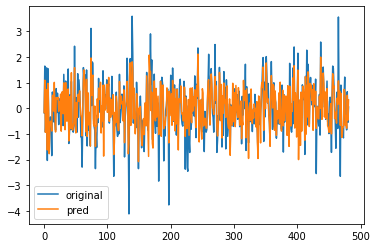

In [63]:
compare(y_test,lasso.predict(X_test[selectedCols]))

### Top 15 Features

Text(0.5, 1.0, 'Lasso Coeff')

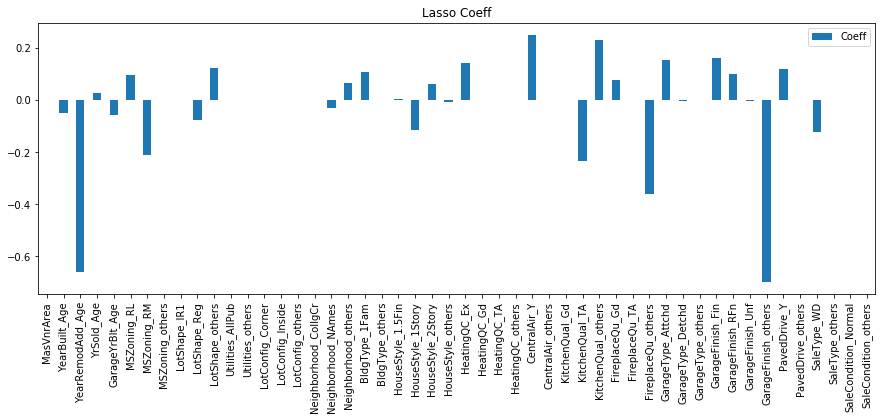

In [64]:
lassoDF=pd.DataFrame(lasso.coef_,index=selectedCols,columns=["Coeff"])
lassoDF.plot(kind='bar',figsize=(15,5))
plt.title("Lasso Coeff")

Text(0.5, 1.0, 'Ridge Coeff')

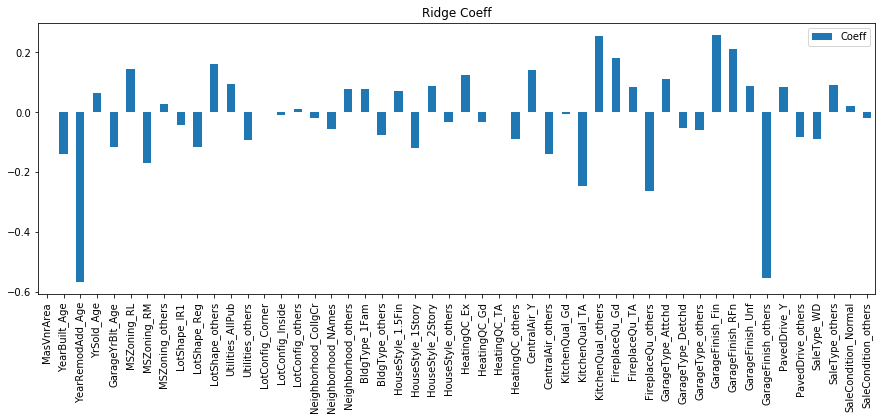

In [65]:
ridgeDF=pd.DataFrame(ridge.coef_.reshape(-1,1),index=selectedCols,columns=["Coeff"])
ridgeDF.plot(kind='bar',figsize=(15,5))
plt.title("Ridge Coeff")

In [66]:
lassoFeatures=lassoDF.abs().sort_values(by='Coeff',ascending=False).iloc[:10,].index.tolist()
lassoDF.abs().sort_values(by='Coeff',ascending=False).iloc[:10,]

,Coeff
GarageFinish_others,0.700424
YearRemodAdd_Age,0.659931
FireplaceQu_others,0.363211
CentralAir_Y,0.249702
KitchenQual_TA,0.234501
KitchenQual_others,0.228617
MSZoning_RM,0.213310
GarageFinish_Fin,0.159313
GarageType_Attchd,0.155031
HeatingQC_Ex,0.143094


In [67]:
ridgeFeatures=ridgeDF.abs().sort_values(by='Coeff',ascending=False).iloc[:10,].index.tolist()
ridgeDF.abs().sort_values(by='Coeff',ascending=False).iloc[:10,]

,Coeff
YearRemodAdd_Age,0.568012
GarageFinish_others,0.554830
FireplaceQu_others,0.263145
GarageFinish_Fin,0.257515
KitchenQual_others,0.252651
KitchenQual_TA,0.246509
GarageFinish_RFn,0.209693
FireplaceQu_Gd,0.180430
MSZoning_RM,0.170285
LotShape_others,0.161262


In [68]:
resFeatures=pd.DataFrame()
lassoFeatures.sort()
ridgeFeatures.sort()
resFeatures['lassoFeatures']=lassoFeatures
resFeatures['ridgeFeatures']=ridgeFeatures
#zip(lassoFeatures,ridgeFeatures)).sort_values(by=[0,1])
resFeatures

,lassoFeatures,ridgeFeatures
0,CentralAir_Y,FireplaceQu_Gd
1,FireplaceQu_others,FireplaceQu_others
2,GarageFinish_Fin,GarageFinish_Fin
3,GarageFinish_others,GarageFinish_RFn
4,GarageType_Attchd,GarageFinish_others
5,HeatingQC_Ex,KitchenQual_TA
6,KitchenQual_TA,KitchenQual_others
7,KitchenQual_others,LotShape_others
8,MSZoning_RM,MSZoning_RM
9,YearRemodAdd_Age,YearRemodAdd_Age


Above are the variable which are significant in predict the price of the house for both the regression.

House remodel year, central air conditioning, Fire place, Garage finsihing, Garage attached to home, kitchen quality are the significantly increase in house price

Optimal value for lambda is 10 for ridge regression
optimal value for lamda is 0.005 for lasso regression.